In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

df = pd.read_csv('scrubbed_pandemic_final.csv')
df

,Unnamed: 0,location,month,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
0,1,Afghanistan,2,5,0,2.010690,38928341,1803.987,0.498
1,2,Afghanistan,3,892,17,40.831935,38928341,1803.987,0.498
2,3,Afghanistan,4,24801,794,80.740000,38928341,1803.987,0.498
3,4,Afghanistan,5,212674,4814,84.260000,38928341,1803.987,0.498
4,5,Afghanistan,6,734634,14418,80.182667,38928341,1803.987,0.498
...,...,...,...,...,...,...,...,...,...
1777,1865,Zimbabwe,6,11693,141,72.715333,14862927,1899.775,0.535
1778,1866,Zimbabwe,7,45546,663,76.583548,14862927,1899.775,0.535
1779,1867,Zimbabwe,8,160139,4017,80.560000,14862927,1899.775,0.535
1780,1868,Zimbabwe,9,222393,6593,78.457667,14862927,1899.775,0.535


In [167]:
df_pop = df.sort_values("population", ascending=False)

# Population timescale of countries

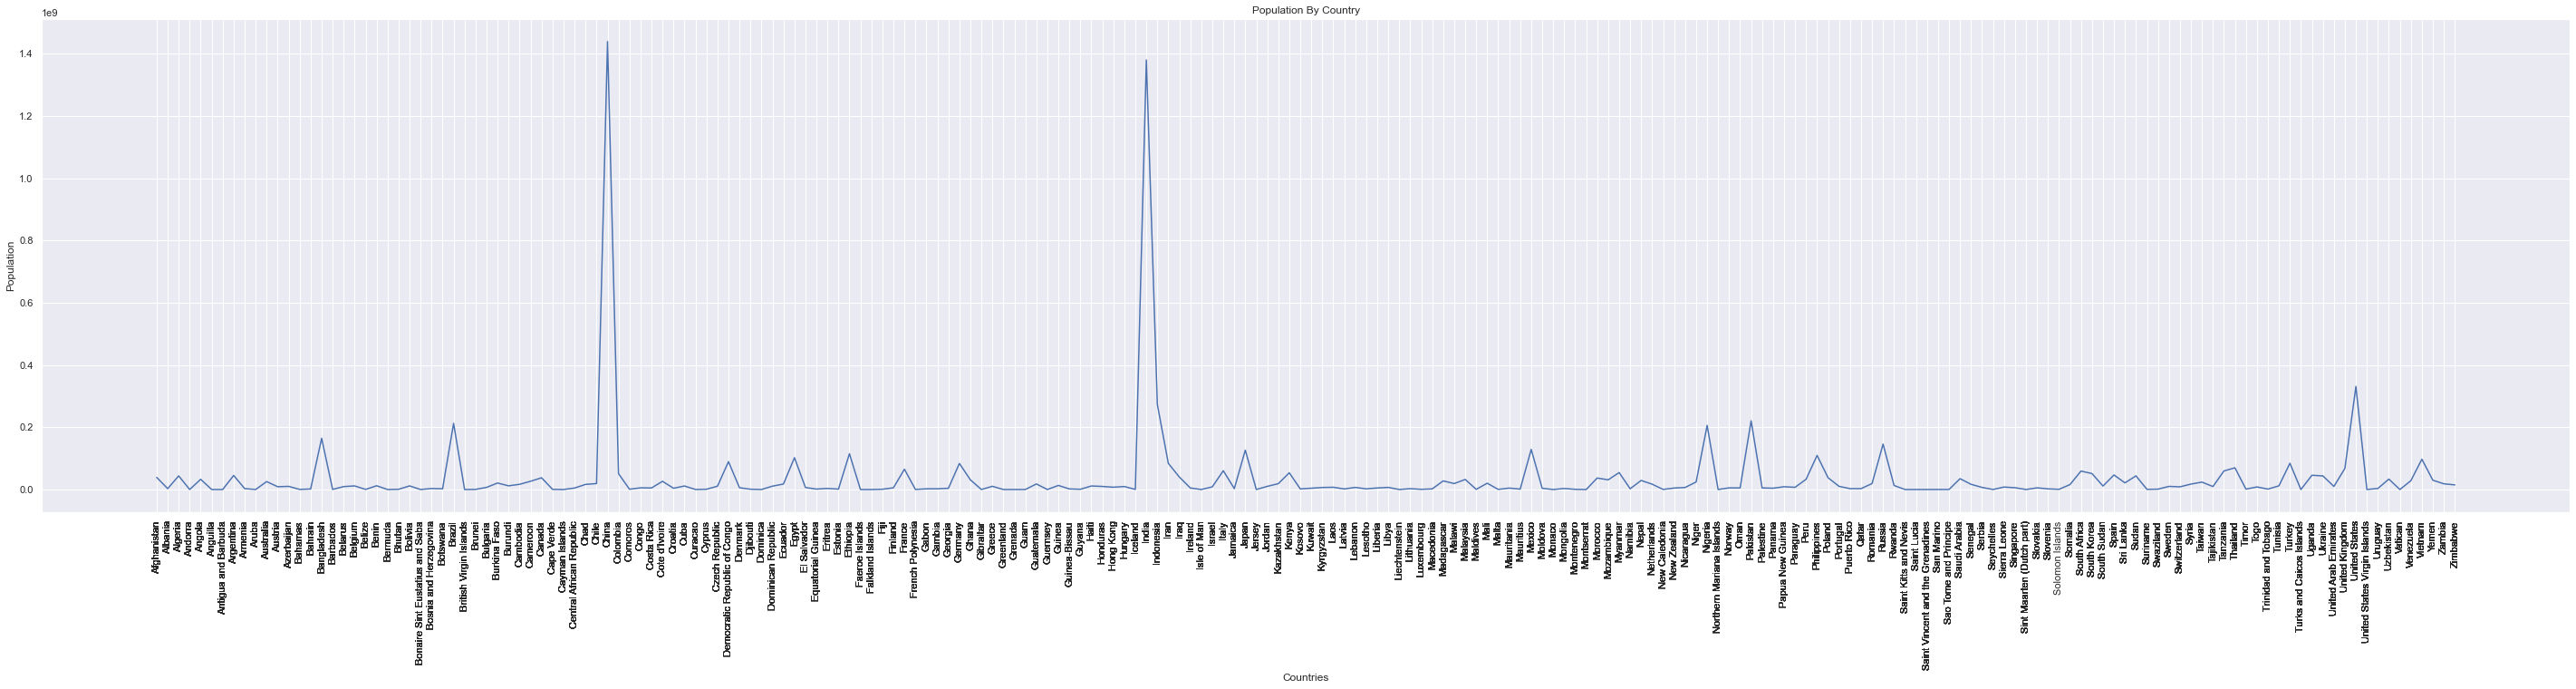

In [176]:
figure(figsize=(50, 10))

plt.plot(df['location'], df['population'])
plt.title('Population By Country')
plt.xlabel('Countries')
plt.ylabel('Population')

plt.xticks(df_pop['location'], label="Countries", rotation=90)

plt.show()

In [177]:
# name of all countries countries
df_pop['location'].value_counts()

Macedonia          11
Monaco             11
China              11
Taiwan             11
Belgium            10
                   ..
South Sudan         7
Tajikistan          6
Lesotho             6
Comoros             6
Solomon Islands     1
Name: location, Length: 210, dtype: int64

In [178]:
# grouping the data further by countries
country_agg = df_pop.groupby(["location"], as_index=False).agg(
    {
     'total_cases': 'sum', 
     'total_deaths':'sum', 
     'stringency_index': 'mean', 
     'population': 'first', 
     'gdp_per_capita': 'first', 
     'human_development_index': 'first'
    })

country_agg


,location,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
0,Afghanistan,5126433,165875,53.247755,38928341,1803.987000,0.498
1,Albania,1071951,31056,61.465869,2877800,11803.431000,0.785
2,Algeria,4893999,206429,60.909531,43851043,13913.839000,0.754
3,Andorra,223576,9850,40.203210,77265,9777.522242,0.858
4,Angola,304005,11820,75.591247,32866268,5819.495000,0.581
...,...,...,...,...,...,...,...
205,Venezuela,4839834,40840,81.239320,28435943,16745.022000,0.761
206,Vietnam,122618,2318,56.485342,97338583,6171.884000,0.694
207,Yemen,228925,64304,42.450945,29825968,1479.147000,0.452
208,Zambia,1129913,26475,45.666856,18383956,3689.251000,0.588


In [180]:
# sorting the group data by countries with Highest population at the top
sort_coun_agg = country_agg.sort_values("population", ascending=False)
df_selcoun = sort_coun_agg.head(20)
df_selcoun.head(40)

,location,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
41,China,21632319,1066939,59.871230,1439323774,15308.712,0.752
90,India,407771615,7247327,60.998468,1380004385,6426.674,0.640
200,United States,746014098,26477574,52.540198,331002647,54225.446,0.924
91,Indonesia,21570149,916111,50.234151,273523621,11188.744,0.694
145,Pakistan,37738077,789557,51.910775,220892331,5034.708,0.562
27,Brazil,425704517,14340567,58.123214,212559409,14103.452,0.759
141,Nigeria,6107371,125473,51.406610,206139587,5338.454,0.532
15,Bangladesh,35266178,484534,73.628312,164689383,3523.984,0.608
157,Russia,132888951,2131571,50.978774,145934460,24765.954,0.816
125,Mexico,74347548,7295850,50.888418,128932753,17336.469,0.774


In [182]:
sort_coun_agg.columns

Index(['location', 'total_cases', 'total_deaths', 'stringency_index',
       'population', 'gdp_per_capita', 'human_development_index'],
      dtype='object')

In [183]:
# Rename columns
df_selcoun = df_selcoun.rename(columns = {'location':'loc', 'stringency_index': 'SI', 'population': 'pop', 'gdp_per_capita':'GDP', 'human_development_index': 'HDI'})
df_selcoun.columns

Index(['loc', 'total_cases', 'total_deaths', 'SI', 'pop', 'GDP', 'HDI'], dtype='object')

# Key Definitions

## HDI (Human Development Index)

The Human Development Index (HDI) is a summary measure of average achievement in key dimensions of human development: 
* a long and healthy life 
* being knowledgeable 
* have a decent standard of living.

# Plots for Visualization


Text(0.5, 1.0, 'Countplot of country by GDP Per Capita')

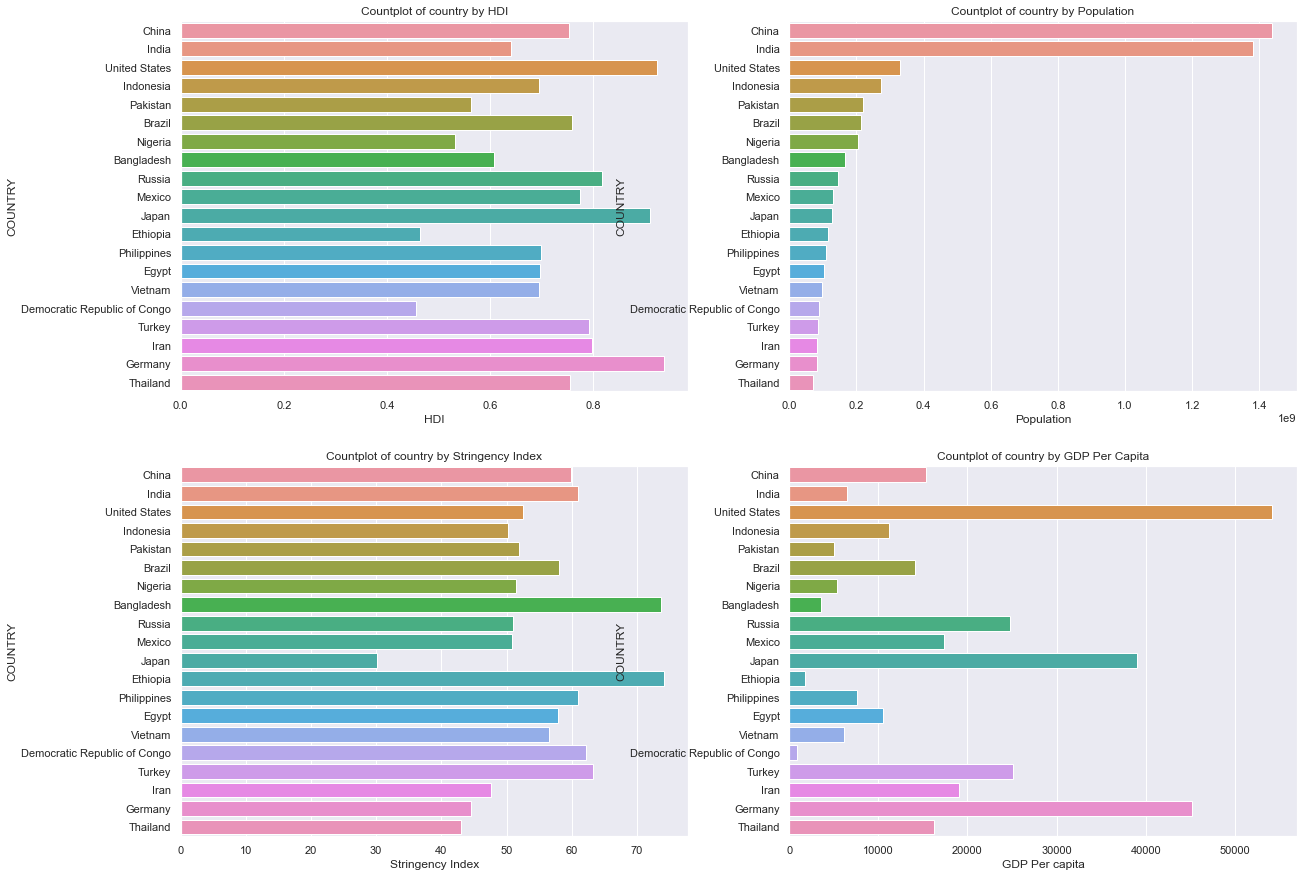

In [173]:
fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(2,2,1) 
sns.barplot(x=df_selcoun['HDI'], y=df_selcoun['loc'])
ax1.set_xlabel('HDI')
ax1.set_ylabel('COUNTRY')
ax1.set_title('Countplot of country by HDI')

ax2 = fig.add_subplot(2,2,2)
sns.barplot(x=df_selcoun['pop'], y=df_selcoun['loc'])
ax2.set_xlabel('Population')
ax2.set_ylabel('COUNTRY')
ax2.set_title('Countplot of country by Population')

ax3 = fig.add_subplot(2,2,3) 
sns.barplot(x=df_selcoun['SI'], y=df_selcoun['loc'])
ax3.set_xlabel('Stringency Index')
ax3.set_ylabel('COUNTRY')
ax3.set_title('Countplot of country by Stringency Index')

ax4 = fig.add_subplot(2,2,4)
sns.barplot(x=df_selcoun['GDP'], y=df_selcoun['loc'])
ax4.set_xlabel('GDP Per capita')
ax4.set_ylabel('COUNTRY')
ax4.set_title('Countplot of country by GDP Per Capita')

# fig = plt.gcf()

### Is HDI dependent on Population? Lets find out

(array([0.0e+00, 2.0e+08, 4.0e+08, 6.0e+08, 8.0e+08, 1.0e+09, 1.2e+09,
        1.4e+09, 1.6e+09]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

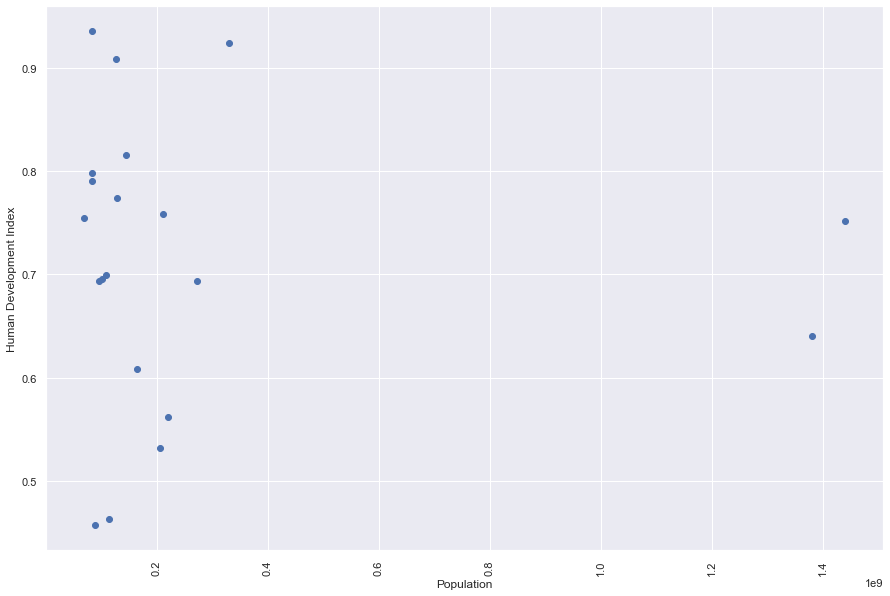

In [174]:
plt.scatter(df_selcoun['pop'], df_selcoun['HDI'])
plt.xlabel('Population')
plt.ylabel('Human Development Index')
plt.xticks(rotation=90)

## What is Stringency Index and what effect did it have on GDP
* It is among the metrics being used by the Oxford COVID-19 Government Response Tracker.
* The Tracker involves a team of 100 Oxford community members who have continuously updated a database of 17 indicators of government response.
* These indicators examine containment policies such as school and workplace closings, public events, public transport, stay-at-home policies.
* The Stringency Index is a number from 0 to 100 that reflects these indicators. A higher index score indicates a higher level of stringency.

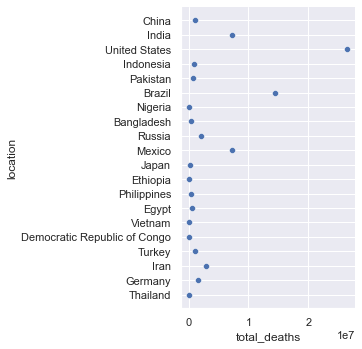

In [64]:
sns.set(rc={'figure.figsize':(15,10)})
sns.relplot(x="total_deaths", y="location", data=df_selcoun)

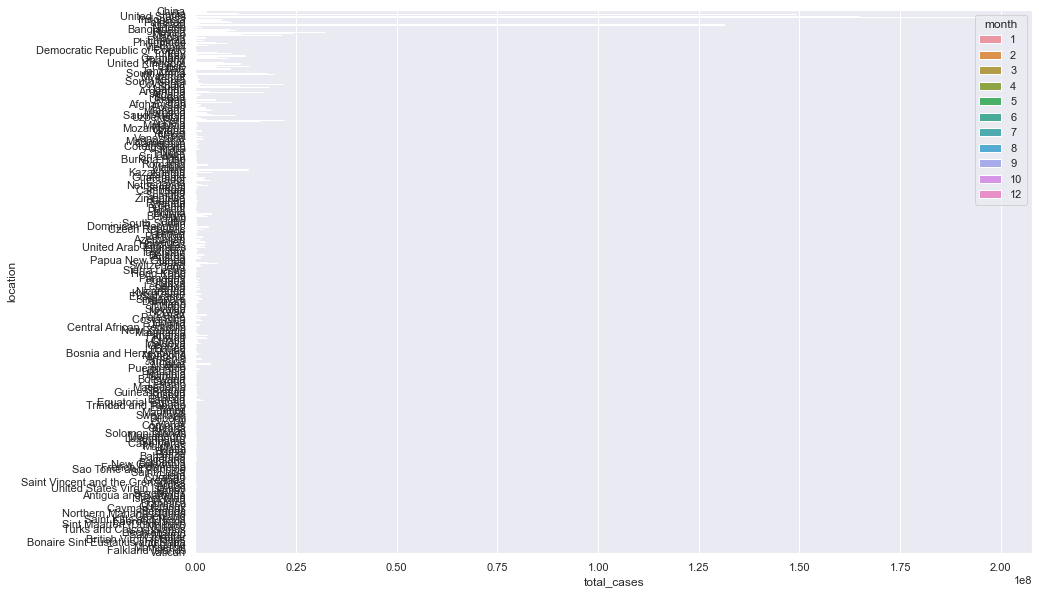

In [69]:

sns.barplot(x="total_cases", y="location", data=df, hue="month")
plt.show()